In [1]:
!pip install -q -U ultralytics ipywidgets

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.10.0, but you have google-cloud-bigquery 2.34.4 which is incompatible.
bigframes 0.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.44.0 which is incompatible.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.2 which is incompatible.
dataproc-jupyter-plugin 0.1.79 requires pydantic~=1.10.0, but you have pydantic 2.9.2 which is incompatible.


In [ ]:
!ls /kaggle/input/train-carriage-detection-dataset/train-carriage-detection

In [3]:
%%file main.py
from ultralytics import YOLO
from accelerate import Accelerator
dataset_path = "/kaggle/input/train-carriage-detection-dataset/train-carriage-detection"
model = YOLO("yolo11n.pt")
train_results = model.train(
    data = dataset_path+"/data.yaml",
    epochs = 100,
    imgsz = 640,
    device=[0, 1]
)

Writing main.py


In [4]:
!python main.py

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Ultralytics 8.3.26 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/input/train-carriage-detection-dataset/train-carriage-detection/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1], workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=No

In [7]:
import torch

model = torch.load("runs/detect/train/weights/best.pt")['model']

In [9]:
!ls /kaggle/input/train-carriage-detection-dataset/train-carriage-detection

README.dataset.txt  README.roboflow.txt  data.yaml  test  train  valid


In [15]:
!ls /kaggle/input/train-carriage-detection-dataset/train-carriage-detection/valid/

images	labels


In [47]:
!pip install -q sixel


image 1/1 /kaggle/input/train-carriage-detection-dataset/train-carriage-detection/valid/images/vagon_0531m_jpg.rf.1a53239e203f932aba62e10669430261.jpg: 640x640 2 bodys, 1 wheels, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
(640, 640, 3)


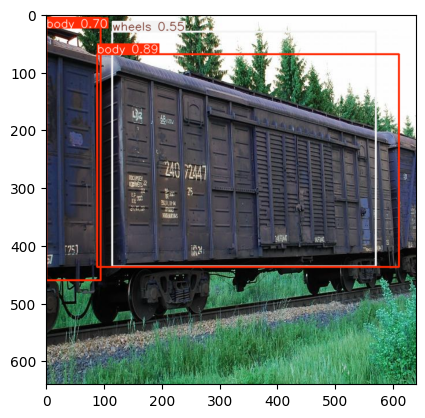


image 1/1 /kaggle/input/train-carriage-detection-dataset/train-carriage-detection/valid/images/451489_original_jpg.rf.4bb1e86a4ad6a7c1f168759f9820254a.jpg: 640x640 1 body, 2 wheelss, 9.7ms
Speed: 1.4ms preprocess, 9.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
(640, 640, 3)


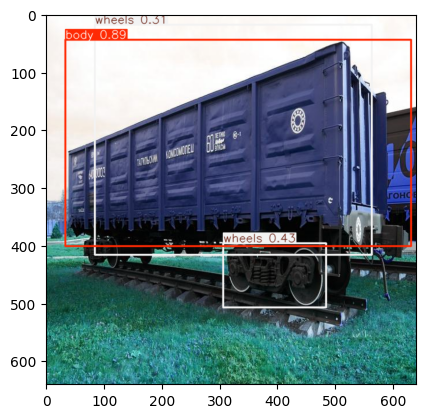


image 1/1 /kaggle/input/train-carriage-detection-dataset/train-carriage-detection/valid/images/vagon_0223c_jpg.rf.81d9a0b645ee5b343b7a97f916772153.jpg: 640x640 2 bodys, 2 wheelss, 10.2ms
Speed: 1.5ms preprocess, 10.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
(640, 640, 3)


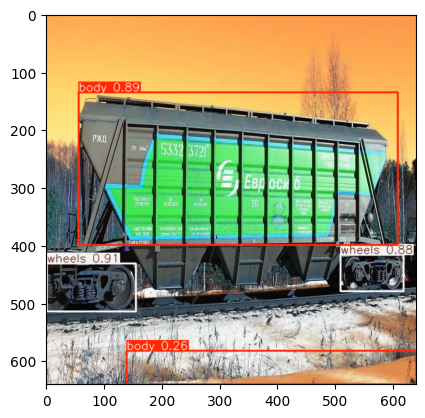


image 1/1 /kaggle/input/train-carriage-detection-dataset/train-carriage-detection/valid/images/zisterna_0218c_jpg.rf.e12e1dda00c1e80d92bfb34d9aeb3f2f.jpg: 640x640 2 bodys, 2 wheelss, 9.9ms
Speed: 2.1ms preprocess, 9.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
(640, 640, 3)


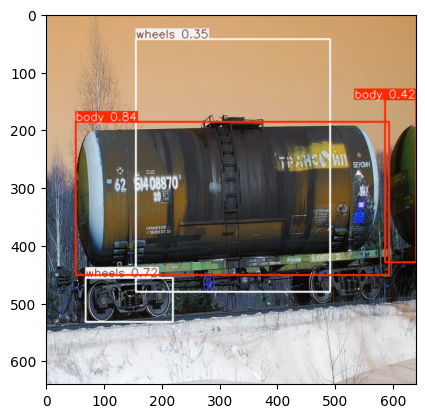


image 1/1 /kaggle/input/train-carriage-detection-dataset/train-carriage-detection/valid/images/iRFPCSUPL_jpg.rf.609bce895f1b4350e5b476068fc8e35f.jpg: 640x640 2 bodys, 3 wheelss, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
(640, 640, 3)


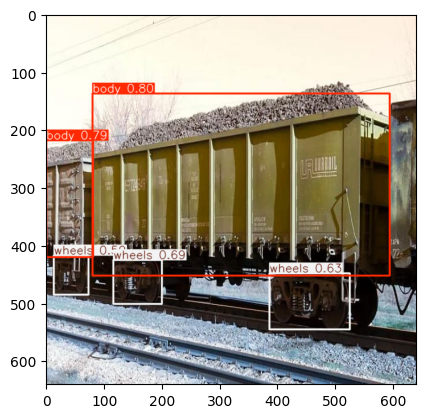

In [57]:
import os
import cv2
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO


def print_all(obj):
    if isinstance(obj,torch.Tensor):
        print(obj.shape)
        return
    if isinstance(obj,list):
        print("list")
        [print_all(v) for v in obj]
        return
    if isinstance(obj,dict):
        print("dict")
        for v in obj:
            print(v)
            print_all(obj[v])
        return
    print(dir(obj))
        

# Path to a few images from your dataset (for demonstration)
image_folder = "/kaggle/input/train-carriage-detection-dataset/train-carriage-detection/valid/images"
image_files = [os.path.join(image_folder, img) for img in os.listdir(image_folder)[:5]]  # Load a few images
model = YOLO("runs/detect/train/weights/best.pt")

# Predict and display each image individually
for i, img_path in enumerate(image_files):
    # Load the image with OpenCV and convert to RGB
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Convert to Tensor and add a batch dimension (NCHW format)
    img_tensor = torch.tensor(img_rgb).permute(2, 0, 1).unsqueeze(0).float().half() / 255.0  # Normalize to [0, 1] and convert to float16
    results = model.predict(source=img_path)
    
    # Plot inference results
    plot = results[0].plot()  
    print(plot.shape)
    plt.imshow(plot)
    plt.show()

In [60]:
metrics = model.val()

Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /kaggle/input/train-carriage-detection-dataset/train-carriage-detection/valid/labels... 196 images, 0 backgrounds, 0 corrupt: 100%|██████████| 196/196 [00:00<00:00, 627.22it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/train-carriage-detection-dataset/train-carriage-detection/valid is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 564, len(boxes) = 901. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]


                   all        196        901      0.507      0.485      0.497      0.312
                  body        194        324      0.711      0.858      0.872      0.607
              coupling         92        110      0.329      0.136      0.175     0.0882
                wheels        194        467      0.481       0.46      0.444      0.241
Speed: 1.4ms preprocess, 4.0ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val3


In [77]:
#  из-за того что датасет размечен как попало, метрики вышли такие-себе
metrics.confusion_matrix.matrix

array([[        277,           2,           4,         116],
       [          1,          15,           2,          33],
       [          3,           2,         222,         237],
       [         43,          91,         239,           0]])